<a href="https://colab.research.google.com/github/mkbahk/graphcore-ipu-demo/blob/main/MNIST_Keras_AI_101_withTransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module Import

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#Hyperparameters

In [ ]:
IMG_SIZE = 28

#Load MNIST DataSet


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("# of x_train", len(x_train))
print("# of y_train", len(y_train))
print("# of x_test", len(x_test))
print("# of y_test", len(y_test))

#Transfer Learning 데모를 위하 Training Set을 2개로 슬라이싱



In [ ]:
tx_train = x_train[50000:]
ty_train = y_train[50000:]

x_train = x_train[:50000]
y_train = y_train[:50000]

print("# of x_train", len(x_train))
print("# of y_train", len(y_train))

print("# of tx_train", len(tx_train))
print("# of ty_train", len(ty_train))

#ValidationSet을 위한 TestSet 슬라이싱

In [ ]:
x_val = x_test[5000:]
y_val = y_test[5000:]

x_test = x_test[:5000]
y_test = y_test[:5000]

print("# of x_test", len(x_test))
print("# of y_test", len(y_test))

print("# of x_val", len(x_val))
print("# of y_val", len(y_val))

In [ ]:
i = 0 
for i in range(5):
  print(y_train[i])
#end of for

In [ ]:
import matplotlib.pyplot as plt

image_index = 1 # You may select anything up to 60,000

print(x_train[image_index], "\n\n") # The label is 0
print(x_test[image_index], "\n\n") # The label is 2

print(y_train[image_index], "\n\n")
print(y_test[image_index], "\n\n")

print("x_train", x_train.shape, "x_test", x_test.shape, "리스트(배열,행렬)\n\n")
print("y_train", y_train.shape, "y_test", y_test.shape, "리스트(배열,행렬)\n\n")


plt.imshow(x_train[image_index], cmap='Greys')



#one-hot enconding 수행<br>
5 --> 0 0 0 0 0 1 0 0 0 0<br>
1 --> 0 1 0 0 0 0 0 0 0 0<br>


In [ ]:
y_train = keras.utils.to_categorical(y=y_train, num_classes = 10)
ty_train = keras.utils.to_categorical(y=ty_train, num_classes = 10)
y_test = keras.utils.to_categorical(y=y_test, num_classes=10)
y_val = keras.utils.to_categorical(y=y_val, num_classes=10)

#리스트 데이타들 출력해 보기
j = 0
for j in range(2):
   print("\n=====Y Train  Value======", y_train[j])
#end of for

t = 0
for t in range(2):
   print("\n=====TY Train Value======", ty_train[j])
#end of for

k = 0
for k in range(2):
   print("\n=====Y Test   Value======", y_test[k])
#end of for

v = 0
for v in range(2):
   print("\n=====Y Val    Value======", y_val[v])
#end of for

#DataSet 형변환


In [ ]:
x_train = x_train.reshape(50000, 28*28)
tx_train = tx_train.reshape(10000, 28*28)

x_test = x_test.reshape(5000, 28*28)
x_val = x_val.reshape(5000, 28*28)

print(x_train.shape, tx_train.shape,  x_test.shape, x_val.shape)
print(y_train.shape, ty_train.shape, y_test.shape, x_val.shape)

In [ ]:
# https://www.youtube.com/watch?v=UOvPeC8WOt8

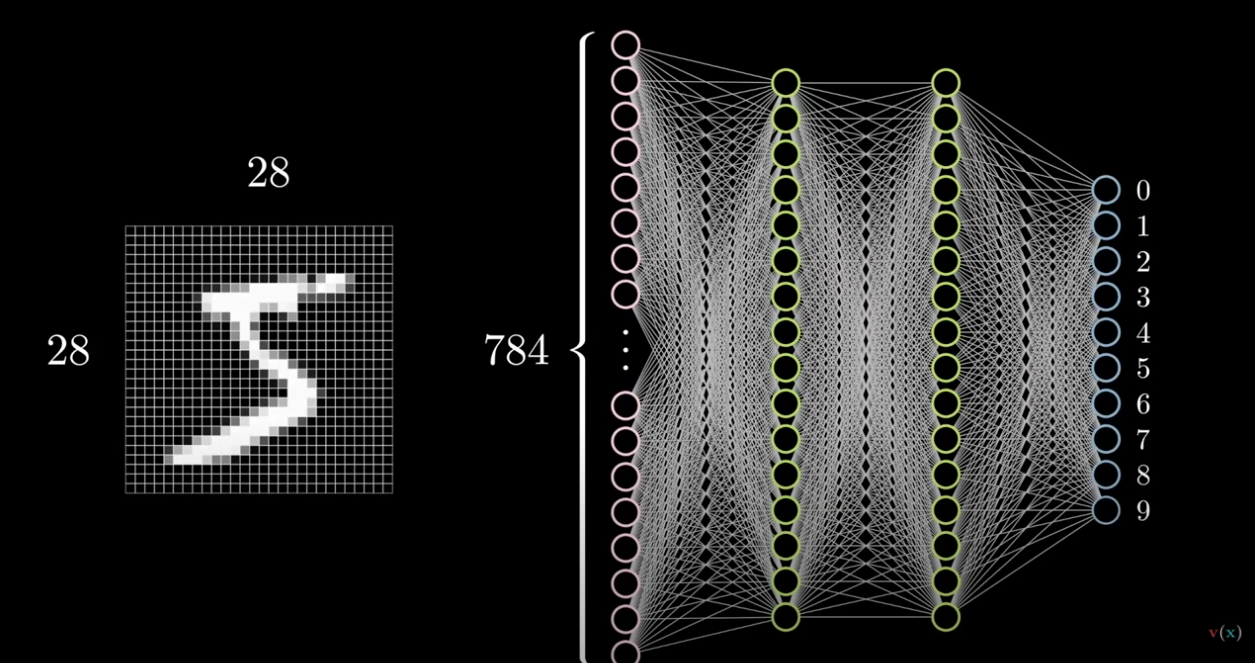

#모델 구조 생성


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28*28,)))
model.add(keras.layers.Dense(32, activation="sigmoid"))
model.add(keras.layers.Dense(32, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="sigmoid"))
model.add(keras.layers.Flatten())
model.output_shape

모델구조 #보기

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss="categorical_crossentropy", metrics=['accuracy'])

#모델구성요소 컴파일 및 구조보기
<br>파라메터 숫자: 
<br>dense_3: (28x28) x 32+32(bias) = 25120
<br>dense_4: 32x32+32(bias) = 1056
<br>dense_5: 32x10+10(bias) = 30

In [ ]:
model.summary()

#모델 훈련


In [ ]:
hist=model.fit(x=x_train, y=y_train, batch_size=1000, epochs=100, validation_data=(x_val, y_val))

#생성된 모델을 이용한 추론(평가, 예측)


In [ ]:
model.evaluate(x_test, y_test )

#모델 수행 히스토리 그래프보기

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig, loss_ax =  plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='loss')
#loss_ax.plot(hist.history['val_loss'], 'g', label='validation loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='accuracy')
#acc_ax.plot(hist.history['val_accuracy'], 'r', label='validation accuracy')

plt.legend(['accuracy','loss'])
#plt.legend(['train loss', 'train accuracy', 'validation loss', 'validation accuracy'])
plt.show()

#모델 바이러리(Weight) 저장

In [ ]:
model.save("MNIST-Keras-101-Pre_trained.h5")
model.save_weights("MNIST-Keras-101-Pre_trained_weights")

#저장된 모델 로드


In [ ]:
from keras.models import load_model
ts_model = load_model("MNIST-Keras-101-Pre_trained.h5")
ts_model.summary()

#로드된 모델에 새로운 데이타 Re-Training(Transfer Learning)


In [ ]:
hist=ts_model.fit(x=tx_train, y=ty_train, batch_size=1000, epochs=100, validation_data=(x_val, y_val))

In [ ]:
ts_model.evaluate(x_test, y_test)

In [ ]:
fig, loss_ax =  plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='loss')
#loss_ax.plot(hist.history['val_loss'], 'g', label='validation loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='accuracy')
#acc_ax.plot(hist.history['val_accuracy'], 'r', label='validation accuracy')

plt.legend(['accuracy','loss'])
#plt.legend(['train loss', 'train accuracy', 'validation loss', 'validation accuracy'])
plt.show()

In [ ]:
model.save("MNIST-Keras-101-Transfer_learned.h5")
model.save_weights("MNIST-Keras-101-Transfer_learned_weights")

In [ ]:
# End of Codes...